In [6]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7690"
username = "neo4j"
password = "Aryan@2004"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [7]:
try:
    with driver.session() as session:
        result = session.run("RETURN 1 AS test")
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful


In [8]:
import os
with open('./path.txt','r') as f:
    path = f.read()
os.path.exists(path)

False

In [4]:
business_path = "yelp_academic_dataset_business.json"
checkin_path = "yelp_academic_dataset_checkin.json"
review_path = "yelp_academic_dataset_review.json"
tip_path = "yelp_academic_dataset_tip.json"
user_path = "yelp_academic_dataset_user.json"

business_path, checkin_path, review_path, tip_path, user_path = list(map(lambda y: path + '/' + y,[business_path, checkin_path, review_path, tip_path, user_path]))

# User filtering

In [4]:
import pandas as pd
import json

df_user = pd.concat(pd.read_json(user_path, lines=True, chunksize=1000), ignore_index=True)
df_user = df_user[df_user['useful'] > 40]
print(df_user.shape[0])
# df_checkin = pd.concat(pd.read_json(checkin_path, lines=True, chunksize=1000), ignore_index=True)
# df_tip = pd.concat(pd.read_json(tip_path, lines=True, chunksize=1000), ignore_index=True)

221708


In [5]:
df1 = df_user[df_user['fans'] > 10]
print(df1.shape[0])
df2 = df1[df1['review_count'] > 100]
print(df2.shape[0])
df3 = df2[df2['friends'].str.split(',').map(len) > 1]
print(df3.shape[0])

46770
41443
41371


In [6]:
df3.to_csv('users.csv', index=False)

In [7]:
df3.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000,41371.000000
mean,378.433685,1321.367915,630.970849,922.974837,47.183172,3.904295,78.920548,9.839743,7.498175,5.693795,2.877499,53.421406,125.114138,119.974572,119.974572,42.077325,54.362428
std,389.038425,4245.140841,2752.974087,3809.825993,115.696545,0.345328,503.637927,88.287079,104.765209,78.481771,69.555291,413.212087,817.948308,658.679951,658.679951,219.010969,657.191221
min,101.000000,42.000000,0.000000,8.000000,11.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,181.000000,310.000000,82.000000,136.000000,15.000000,3.690000,4.000000,1.000000,0.000000,0.000000,0.000000,6.000000,9.000000,9.000000,9.000000,5.000000,2.000000
50%,274.000000,529.000000,171.000000,257.000000,24.000000,3.910000,10.000000,3.000000,1.000000,0.000000,0.000000,13.000000,19.000000,21.000000,21.000000,12.000000,5.000000
75%,440.000000,1036.000000,410.000000,589.000000,43.000000,4.130000,31.000000,7.000000,3.000000,2.000000,1.000000,31.000000,49.000000,57.000000,57.000000,28.000000,14.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,13501.000000,14180.000000,13654.000000,12669.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000


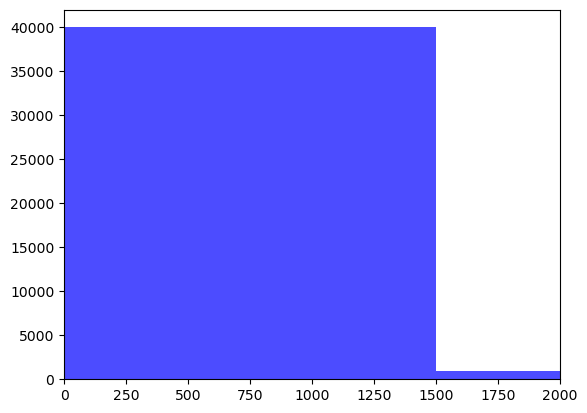

In [8]:
import matplotlib.pyplot as plt

plt.hist(df3['friends'].str.split(',').map(len), color='blue', alpha=0.7)
plt.xlim(0,2000)
plt.show()


# Business Filtering

In [9]:
df_business = pd.concat(pd.read_json(business_path, lines=True, chunksize=1000), ignore_index=True)

In [10]:
print(df_business.shape[0])
df_business1 = df_business[df_business['review_count'] > 44]
print(df_business1.shape[0])

150346
32115


In [11]:
df_business1.describe()

,latitude,longitude,stars,review_count,is_open
count,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000
mean,36.169592,-89.537079,3.711038,156.390160,0.798350
std,5.322853,14.995062,0.743344,229.128127,0.401239
min,27.564457,-120.083745,1.000000,45.000000,0.000000
25%,30.011992,-90.324650,3.500000,61.000000,1.000000
50%,38.635129,-86.146391,4.000000,91.000000,1.000000
75%,39.947478,-75.405666,4.000000,165.000000,1.000000
max,53.649743,-74.682591,5.000000,7568.000000,1.000000


(array([3.1612e+04, 3.6800e+02, 8.2000e+01, 2.7000e+01, 9.0000e+00,
        9.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  45. ,  797.3, 1549.6, 2301.9, 3054.2, 3806.5, 4558.8, 5311.1,
        6063.4, 6815.7, 7568. ]),
 <BarContainer object of 10 artists>)

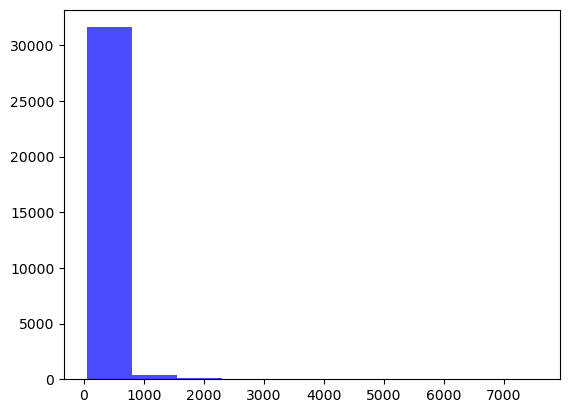

In [12]:
import matplotlib.pyplot as plt

plt.hist(df_business1['review_count'], color='blue', alpha=0.7)

In [13]:
df_business1.to_csv('business.csv', index=False)

# Review Filtering

In [ ]:
import pandas as pd

df_review = pd.concat(pd.read_json(review_path, lines=True, chunksize=1000), ignore_index=True)
print(df_review.shape[0])
df_review.describe()

In [5]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [71]:
from tqdm import tqdm
from ast import literal_eval

df3 = pd.read_csv('users.csv')
df3['user_id'] = df3['user_id'].map(lambda x: x.strip())
user_set = set(df3['user_id'])

tqdm.pandas(desc="Splitting")
df3['friends'] = df3['friends'].fillna('').str.split(',').progress_map(lambda x: [i.strip() for i in x if i])
df3['friends'] = df3['friends'].progress_map(lambda x: [i for i in x if i in user_set] if isinstance(x, list) else [])
df3['friends'] = df3['friends'].progress_map(lambda x: ','.join(x) if isinstance(x, list) else '')

df3['friends'].map(len).describe()

Splitting: 100%|██████████| 41371/41371 [00:00<00:00, 562504.62it/s]


count     41371.000000
mean       2004.496024
std        4359.324620
min           0.000000
25%         390.000000
50%         804.000000
75%        1816.000000
max      123141.000000
Name: friends, dtype: float64

In [69]:
df3.iloc[0]['friends']

'NSCy54eWehBJyZdG2iE84w,1aU0r7X2luo9P8hfSpq6ng,TMLVzNYs-zwwREudyvI08A,36LgEtwt6ROhrCtuPjfRmQ,-f6amuvfIVS7VX65BqZ6pQ,dbrGVOcscXUQjQGi_0bnaQ,3gE3_MDUsCg-Tay4t1R5nA,zlqbbhAujrMla0eDiK7mIw,OLOCVi0PqJUdpUuIj4i70g,HpgDCyQGSR0TzYi00-wLew,0zqXX2SG7UiInTtU3JhWlg,B_RhT6CpAllq9NxtkpiDTA,kaKEer3UR5utYZsgp2tgPw,fcaikKJAYxlwO_RAiZm5Qg,sFd40YBmYCnOyHqoGlktzw,Dd3EKYgkkNnd5hV9hBMkYQ,eCcjxh8zjAqn-kZVWZ_HJQ,ptLIFLUPwg3MYt-J62s3iA,V8OsxfIHpYWeMMeEsowHRw,dkkMQorZE0EF-F5wOiqA7w,W1gO_eI8Jh_FDvnCvJDRYg,K_yjrrDZBSic30Gr-dopqA,Y92t-YwfQzr948YZnN4rmg,0-n89YwF9LExnPIwgIVhoA,hiebCHxmMxdD1vAVtI2RVQ,tb_qrOfNR7POIz5nZLh3Vg,Nc4uWHBuFF407t3MzX0tOg,XGaMoQ6sg0B5hSzC5aRmdw,nT3tLANzGy0a7DuB_GIQjA,2nKm_urHROBCbWvbYrZqEQ,Ud6j2HN40qEhycq2PuwcBA,dR_r5k2quiaXvZ4BlTqhsg,6p08rh_BYAodK5PpplbtHw,_xzu_cuxhcbbfx6ASYev_g,02YdTEWFTFr6p71AZJVQ0Q,WBmqTb2IrJu9_nIWgZu21g,-_dGQOHpKRFgDy5yTjjlUQ,hVPyu7QWaSQgOlz0rppmkg,24pirQC_JSQ-UunYOV5-6Q,9wLtMApHLswed6DbvXscwg,yyI3fTGSRgrNSaSVTqMV0A,GXn4ZsasLKh0qZ5g3nIqcQ,dKA5pV924YpE3zmAzShLcw,A4HNP067h3

In [70]:
df3.to_csv('users.csv', index=False)


In [64]:
from ast import literal_eval
df3 = pd.read_csv('users.csv')

df3['friends'] = df3['friends'].apply(literal_eval).apply(lambda x: ','.join(x))
df3.to_csv('users.csv', index=False)

In [33]:
df3.to_csv('users.csv', index=False)

In [6]:
df3 = pd.read_csv('users.csv')

In [7]:
df_business1 = pd.read_csv('business.csv')

In [ ]:
# check if user_id is in df3 and business_id is in df_business1
df_review1 = df_review[df_review['user_id'].isin(df3['user_id'])]
print(df_review1.shape[0])
df_review2 = df_review1[df_review1['business_id'].isin(df_business1['business_id'])]

1042738


In [12]:
print(df_review2.shape[0])
df_review2.describe()

801459


,stars,useful,funny,cool,date
count,801459.000000,801459.000000,801459.000000,801459.000000,801459
mean,3.936845,2.932030,1.073764,1.879973,2015-10-25 18:55:17.978704128
min,1.000000,0.000000,0.000000,0.000000,2005-02-16 03:23:22
25%,3.000000,0.000000,0.000000,0.000000,2013-05-14 00:35:43.500000
50%,4.000000,2.000000,0.000000,1.000000,2016-02-04 01:53:25
75%,5.000000,3.000000,1.000000,2.000000,2018-06-19 13:49:46
max,5.000000,399.000000,370.000000,399.000000,2022-01-19 18:59:27
std,1.028934,5.464713,3.190071,4.681420,NaN


In [6]:
import pandas as pd

df_review2 = pd.read_csv('review.csv')

In [7]:
print(df_review2[df_review2['useful'] > 3].shape[0])
print(df_review2[df_review2['useful'] > 8].shape[0])
df_review2 = df_review2[df_review2['useful'] > 8]
print(df_review2.shape[0])

196374
54686
54686


In [8]:
df_review2.to_csv('review.csv', index=False)

(0.0, 80.0)

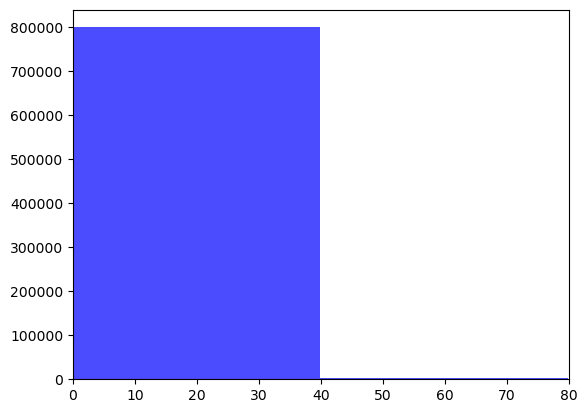

In [17]:
import matplotlib.pyplot as plt

plt.hist(df_review2['useful'],color='blue',alpha=0.7)
plt.xlim(0,80)

In [35]:
business_path = "business.csv"
review_path = "review.csv"
# tip_path = "yelp_academic_dataset_tip.json"
user_path = "users.csv"

# business_path, review_path, user_path = list(map(lambda y: path + '/' + y,[business_path, review_path, user_path]))
# business_path, review_path, user_path = list(map(lambda y:'"'+ path + '/' + y+'"',[business_path, review_path, user_path]))
print(business_path)

business.csv


In [10]:
def import_csv(tx, csv_file_path, query):
    with open(csv_file_path, 'r') as file:
        tx.run(query, file=file)
    # with open(csv_file_path, 'r') as file:
    #     csv_data = file.read()
    # tx.run(query,file=file)
# csv_file_path = "path/to/your/data.csv"

import pandas as pd

# Read CSV into Pandas DataFrame
users = pd.read_csv(business_path)
print(users.columns)

# Function to create nodes and relationships
def create_graph(tx, df):
    for _, row in df.iterrows():
        # query = """CREATE (n:Businses  {name:$name,
        #change this to use SET so that ubusiness ID is only thing that is unique that is tehre
        query = """CREATE (n:Businses  {business_id:$business_id})
                SET n.name=$name, 
                    n.address=$address,
                    n.city=$city,
                    n.state=$state,
                    n.latitude=$latitude,
                    n.longitude=$longitude,
                    n.stars=$stars,
                    n.review_count=$review_count,
                    n.hours=$hours,
                    n.attributes=$attributes
                    With n, split($categories,', ') as cats
                    unwind cats AS cat
                    merge (c:Category {name: cat})
                    Merge (n)-[:IN_CATEGORY]->(c)
                    """

        tx.run(query, business_id=row['business_id'],
                    address=['address'],
                    name=row['name'],
                    city=row['city'],
                    state=row['state'],
                    latitude=row['latitude'],
                    longitude=row['longitude'],
                    stars=row['stars'],
                    review_count=row['review_count'],
                    hours=row['hours'],
                    attributes=row['attributes'],
                    categories=row['categories'])

# Execute the function within a transaction
with driver.session() as session:
    session.execute_write(create_graph, users)

# Close the driver
driver.close()

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [72]:
# Function to create nodes and relationships
def create_graph(tx, users_data):
    # for _, row in users.iterrows():
    # use create instead of merge for faster 
    query = """UNWIND $users AS row
            CREATE (n:User {user_id: row.user_id})
                SET n.name = row.name,
                    n.review_count = row.review_count,
                    n.yelping_since = row.yelping_since,
                    n.useful = row.useful,
                    n.funny = row.funny,
                    n.cool = row.cool,
                    n.fans = row.fans,
                    n.average_stars = row.average_stars,
                    n.compliment_hot = row.compliment_hot,
                    n.compliment_more = row.compliment_more,
                    n.compliment_profile = row.compliment_profile,
                    n.compliment_cute = row.compliment_cute,
                    n.compliment_list = row.compliment_list,
                    n.compliment_note = row.compliment_note,
                    n.compliment_plain = row.compliment_plain,
                    n.compliment_cool = row.compliment_cool,
                    n.compliment_funny = row.compliment_funny,
                    n.compliment_writer = row.compliment_writer
                """
                # WITH n, split(row.friends, ',') AS frens
                # UNWIND frens AS friend_id
                # MERGE (f:User {user_id: rtrim(friend_id)})
                # MERGE (n)-[:HAS_FRIEND]->(f)
                # """ # eleite not used for now, was causing 
    tx.run(query,users=users_data)

# Execute the function within a transaction
chunk_size = 10000
i=1
for chunk in pd.read_csv(user_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    users= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, users)
    print("chunk processed")
    i+=1

chunk 1 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/496822416.py:40: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 2 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/496822416.py:40: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 3 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/496822416.py:40: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 4 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/496822416.py:40: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 5 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/496822416.py:40: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed


In [74]:
# Function to create nodes and relationships
def create_graph(tx, users_data):
    # for _, row in users.iterrows():
    # use create instead of merge for faster 
    query = """UNWIND $reviews AS row
            CREATE (n:Review {review_id: row.review_id})
                SET n.user_id = row.user_id,
                    n.business_id = row.business_id,
                    n.stars = row.stars,
                    n.useful = row.useful,
                    n.funny = row.funny,
                    n.cool = row.cool,
                    n.date = row.date,
                    n.text = row.text
                """
                # WITH n, split(row.friends, ',') AS frens
                # UNWIND frens AS friend_id
                # MERGE (f:User {user_id: rtrim(friend_id)})
                # MERGE (n)-[:HAS_FRIEND]->(f)
                # """ # eleite not used for now, was causing 
    tx.run(query,reviews=users_data)

# Execute the function within a transaction
chunk_size = 10000
i=1
for chunk in pd.read_csv(review_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    reviews= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, reviews)
    print("chunk processed")
    i+=1

chunk 1 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/2628470541.py:30: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 2 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/2628470541.py:30: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 3 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/2628470541.py:30: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 4 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/2628470541.py:30: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 5 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/2628470541.py:30: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed
chunk 6 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/2628470541.py:30: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


chunk processed


In [ ]:
def import_csv(tx, csv_file_path, query):
    with open(csv_file_path, 'r') as file:
        tx.run(query, file=file)

import pandas as pd

# Function to create nodes and relationships
def create_graph(tx, users_data):
    # for _, row in users.iterrows():
    query = """UNWIND $reviews AS row
            MERGE (n:Review {review_id: row.review_id})
                WITH n, row
                Match (f:User {user_id: row.user_id})
                MERGE (f)-[rel:WRITES_REVIEW]->(n)
                """
    tx.run(query,reviews=users_data)

# Execute the function within a transaction
chunk_size = 10000
i=1
for chunk in pd.read_csv(review_path, chunksize=chunk_size):
    print(f"chunk {i} being processed")
    reviews= chunk.to_dict('records')
    print("chunk converted to dicts")
    with driver.session() as session:
        session.execute_write(create_graph, reviews)
    print("chunk processed")
    i+=1

# Close the driver
driver.close()

chunk 1 being processed
chunk converted to dicts


/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_15952/1894728830.py:25: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


In [ ]:
import json

def add_node_user(tx, data):
    tx.run("MERGE (n:User {user_id: $user_id}) SET n.name = $name, n.review_count = $review_count, n.friends = $friends, n.average_stars = $average_stars, n.elite = $elite, n.funny = $funny",name=data.get('name'),friends=data.get('friends').split(','),user_id=data.get('user_id'),review_count=data.get('review_count'),average_stars=data.get('average_stars'),elite=data.get('elite').split(','),funny=data.get('funny'))
    print("user_id: " + data.get('user_id'))

def add_node_business(tx, data):
    try:
        tx.run("MERGE (n:Business {business_id: $business_id}) SET n.name = $name, n.city = $city, n.state = $state, n.stars = $stars, n.latitude = $latitude, n.longitude = $longitude, n.review_count = $review_count, n.is_open = $is_open, n.attributes = $attributes, n.categories = $categories, n.hours = $hours",name=data.get('name'),attributes=[value for value in data.get('attributes').values()] if data.get('attributes') else [],business_id=data.get('business_id'),city=data.get('city'),state=data.get('state'),stars=data.get('stars'),latitude=data.get('latitude'),longitude=data.get('longitude'),review_count=data.get('review_count'),is_open=data.get('is_open'),categories=data.get('categories').split(','),hours=[value for value in data.get('hours').values()] if data.get('hours') else [])
    except Exception as e:
        print(f"Error: {e}")
        print(f"Error in line: {data.get('name')}")
    print("business_id: " + data.get('business_id'))

def add_node_review(tx, data):
    tx.run("MERGE (n:Review {review_id: $review_id}) SET n.user_id = $user_id, n.business_id = $business_id, n.stars = $stars, n.date = $date, n.text = $text, n.useful = $useful, n.funny = $funny",review_id=data.get('review_id'),user_id=data.get('user_id'),business_id=data.get('business_id'),stars=data.get('stars'),date=data.get('date'),text=data.get('text'),useful=data.get('useful'),funny=data.get('funny'))
    print("review_id: " + data.get('review_id'))

def add_node_tip(tx, data):
    tx.run("MERGE (n:Tip {business_id: $business_id, user_id: $user_id, text: $text}) SET n.compliment_count = $compliment_count, n.date = $date",business_id=data.get('business_id'),user_id=data.get('user_id'),text=data.get('text'),compliment_count=data.get('compliment_count'),date=data.get('date'))
    print("business_id: " + data.get('business_id') + ", user_id: " + data.get('user_id'))

for file_path in [business_path, checkin_path, review_path, tip_path, user_path]:
# for file_path in [user_path]:
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist.")
        continue
    print(f"Processing {file_path}...")
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            if file_path == business_path:
                with driver.session() as session:
                    session.execute_write(add_node_business, data)
            elif file_path == review_path:
                with driver.session() as session:
                    session.execute_write(add_node_review, data)
            elif file_path == tip_path:
                with driver.session() as session:
                    session.execute_write(add_node_tip, data)
            elif file_path == user_path:
                with driver.session() as session:
                    session.execute_write(add_node_user, data)

Processing /Users/aryannath/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-a1cb51cc-283b-4bbf-9542-b59e6a5b4595/import/yelp_academic_dataset_business.json...
business_id: Pns2l4eNsfO8kk83dixA6A
business_id: mpf3x-BjTdTEA3yCZrAYPw
business_id: tUFrWirKiKi_TAnsVWINQQ
business_id: MTSW4McQd7CbVtyjqoe9mw
business_id: mWMc6_wTdE0EUBKIGXDVfA
business_id: CF33F8-E6oudUQ46HnavjQ
business_id: n_0UpQx1hsNbnPUSlodU8w
business_id: qkRM_2X51Yqxk3btlwAQIg
business_id: k0hlBqXX-Bt0vf1op7Jr1w
business_id: bBDDEgkFA1Otx9Lfe7BZUQ
business_id: UJsufbvfyfONHeWdvAHKjA
business_id: eEOYSgkmpB90uNA7lDOMRA
business_id: il_Ro8jwPlHresjw9EGmBg
business_id: jaxMSoInw8Poo3XeMJt8lQ
business_id: 0bPLkL0QhhPO5kt1_EXmNQ
business_id: MUTTqe8uqyMdBl186RmNeA
business_id: rBmpy_Y1UbBx8ggHlyb7hA
business_id: M0XSSHqrASOnhgbWDJIpQA
business_id: 8wGISYjYkE2tSqn3cDMu8A
business_id: ROeacJQwBeh05Rqg7F6TCg
business_id: WKMJwqnfZKsAae75RMP6jA
business_id: qhDdDeI3K4jy2KyzwFN53w
business_id: kfNv-JZ